---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Logistic Regression

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Generating data

In the following, we generated 50 samples from a bivariate Gaussian distribution $\mathcal{ N } ((2, 0)^T , I)$ and labeled this class
**RED**. Similarly, 50 more were drawn from $ \mathcal{N} ((0, 2)^T , I)$ and labeled class **GREEN**.

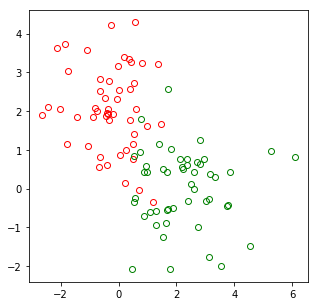

In [2]:
np.random.seed(2)
nr_samples = 100

# Generate 10 means from two bivariate Gaussian distributions
samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2), size=nr_samples/2)
samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2), size=nr_samples/2)

# Join the red and green datasets as X and the class definitions as y
X = np.concatenate([samples_red, samples_green])
y = np.zeros(nr_samples, dtype=int)
y[nr_samples/2:] = 1

# plot the red and green class points
figure(num=None, figsize=(5, 5))
plot(samples_red[:,0], samples_red[:,1], 'o', mec='r', mfc='none')
plot(samples_green[:,0], samples_green[:,1], 'o', mec='g', mfc='none')

# Exercises

## Exercise 1: Logistic Regression

Find the weight values $\mathbf{w}$ that minimize the error 

$$E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^N 
{ln(1 + e^{-\mathbf{y}_n\mathbf{w}^T\mathbf{x}_n})}$$

For this, implement the Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.  
At each training step, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha \Delta E_{\mathbf{in}} $$

where

$$\Delta E_{\mathbf{in}} = - \frac{1}{N} \sum_{n=1}^N 
{\frac{\mathbf{y}_n\mathbf{x}_n}{1 + e^{\mathbf{y}_n\mathbf{w}^T\mathbf{x}_n}}}$$

In [3]:
# prepare the dataset for the matrix manipulations
Xext = np.insert(X, 0, ones(len(X)), axis=1)
y[y==0] = -1

N = Xext.shape[0] 
d = Xext.shape[1]
s = 2000 # learning steps
alpha = 0.2 # learning rate

w = zeros(d)

for step in range(s):
    
    grad = zeros(d)
    for n in range(N):
        x = Xext[n]
        grad = grad + (y[n]*x) / (1. + np.exp(y[n] * w.T.dot(x)))
    grad = -grad/N
    
    w = w - alpha * grad
    
    if np.linalg.norm(grad) < 1e-4:
        break

print w
print step

[-1.3816997   3.25319819 -1.40943642]
1999


Here we visualize the area which is classified as RED and GREEN

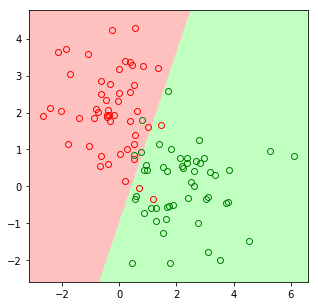

In [4]:
# define the logistic function
def l(x):
    return 1. / (1. + exp(-x))

# define a colormap to colorize the class areas
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colormap',['#FFC0C0', '#C0FFC0'])

# create a mesh of points that cover the full graph area
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))

# use the classifier to predict the class of each mesh point
Xtest = np.c_[xx.ravel(), yy.ravel()]
Xext = np.insert(Xtest, 0, ones(len(Xtest)), axis=1)
Z = l(Xext.dot(w))
Z[Z>0.5] = 1
Z[Z<=0.5] = 0

# colorize the graph using the class of each mesh point
Z = Z.reshape(xx.shape)
figure(figsize=(5, 5))
pcolormesh(xx, yy, Z, cmap=cmap)

# plot the red and green class points
plot(samples_red[:,0], samples_red[:,1], 'o', mec='r', mfc='none')
plot(samples_green[:,0], samples_green[:,1], 'o', mec='g', mfc='none')

## Exercise 2: Logistic Regression with Scikit-Learn

Find the values for the parameters $\mathbf{w}$ using the model sklearn.linear_model.LogisticRegression  
http://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Again, we visualize the area which is classified as RED and GREEN

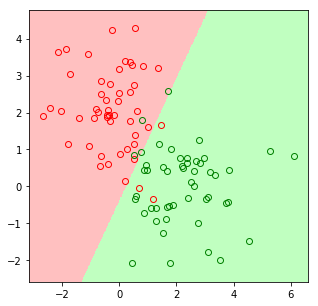

In [6]:
# define a colormap to colorize the class areas
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colormap',['#FFC0C0', '#C0FFC0'])

# create a mesh of points that cover the full graph area
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))

# use the classifier to predict the class of each mesh point
Xtest = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(Xtest)

# colorize the graph using the class of each mesh point
Z = Z.reshape(xx.shape)
figure(figsize=(5, 5))
pcolormesh(xx, yy, Z, cmap=cmap)

# plot the red and green class points
plot(samples_red[:,0], samples_red[:,1], 'o', mec='r', mfc='none')
plot(samples_green[:,0], samples_green[:,1], 'o', mec='g', mfc='none')